<center><font size="16">**Titanic: Machine Learning from Disaster**</font></center>

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this notebook, we will see how to dig deep into the data and visualize it.

 [![TITANIC sinking](https://i.imgur.com/8Rmg0vy.jpg)](https://youtu.be/9xoqXVjBEF8 "TITANIC sinking")

### Data

The data has been split into two groups:

- titanic data (titanic_data.csv)
- competition data (competition.csv)

### Data Dictionary

<center>
<table class="table table-bordered">
<tr>
<th style="width:5%">Variable</th><th style="width:5%">Definition</th><th style="width:5%">Key</th>
</tr>
<tr>
<td>survival</td>
<td>Survival</td>
<td>0 = No, 1 = Yes</td>
</tr>
<tr>
<td>pclass</td>
<td>Ticket class</td>
<td>1 = 1st, 2 = 2nd, 3 = 3rd</td>
</tr>
<tr>
<td>sex</td>
<td>sex</td>
<td></td>
</tr>
<tr>
<td>Age</td>
<td>Age in years</td>
<td></td>
</tr>
<tr>
<td>sibsp</td>
<td># of siblings / spouses aboard the Titanic</td>
<td></td>
</tr>
<tr>
<td>parch</td>
<td># of parents / children aboard the Titanic</td>
<td></td>
</tr>
<tr>
<td>ticket</td>
<td>Ticket number</td>
<td></td>
</tr>
<tr>
<td>fare</td>
<td>Passenger fare</td>
<td></td>
</tr>
<tr>
<td>cabin</td>
<td>Cabin number</td>
<td></td>
</tr>
<tr>
<td>embarked</td>
<td>Port of Embarkation</td>
<td>C = Cherbourg, Q = Queenstown, S = Southampton</td>
</tr>
</table>
</center>

# Wrangling & EDA

**Loading Packages**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

**Loading Data**

In [3]:
data = pd.read_csv('titanic_data.csv')
dftitanic = data.copy()

In [4]:
data_comp = pd.read_csv('competition.csv')
dfcomp = data_comp.copy()

**Checking shape of both datasets**

In [24]:
dftitanic.shape

(891, 12)

In [23]:
dfcomp.shape

(418, 11)

**Display first five rows for both datasets**

In [25]:
dftitanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
dfcomp.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


**Check Data types**

In [26]:
dftitanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [27]:
dfcomp.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

**Getting summaries for both datasets**

In [29]:
#Numerical summary of dftitanic
dftitanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [31]:
#Summary of object type columns for dftitanic
dftitanic.describe(include=["O"])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Wheadon, Mr. Edward H",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


In [30]:
#Summary of all columns of dftitanic
dftitanic.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Wheadon, Mr. Edward H",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [32]:
#Numerical summary of dfcomp
dfcomp.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [33]:
#Summary of object type columns of dfcomp
dfcomp.describe(include = 'O')

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Abelseth, Miss. Karen Marie",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


In [34]:
#Summary of all columns of dfcomp
dfcomp.describe(include = 'all')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3
top,NaN,NaN,"Abelseth, Miss. Karen Marie",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270
mean,1100.500000,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN
std,120.810458,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN
min,892.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,1100.500000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1204.750000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN


### Checking completeness of datasets

In [35]:
dftitanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [36]:
dfcomp.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## Exploration of data

### Exploration of Complete & Important Variables

Our response variable in the training set is complete, as well as Sex and Pclass, which seem two of the most important predictors.

**Survival**

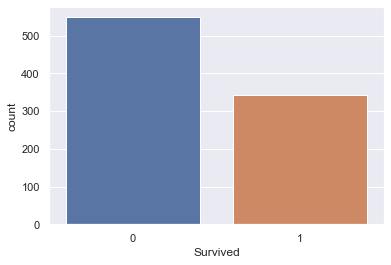

In [38]:
sns.countplot(x='Survived', data=dftitanic);

**Gender & Survival**

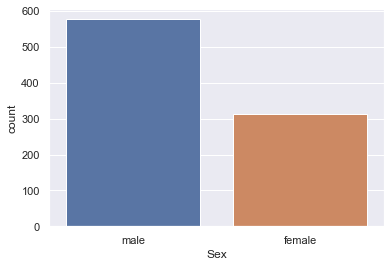

In [41]:
sns.countplot(x='Sex', data=dftitanic);

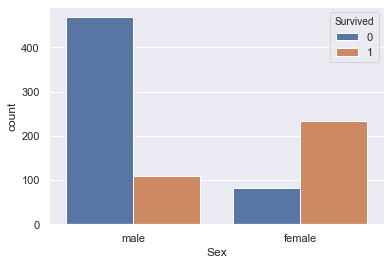

In [42]:
sns.countplot(x='Sex', hue='Survived', data=dftitanic);

**Count plot for gender using 'dfcomp' data**

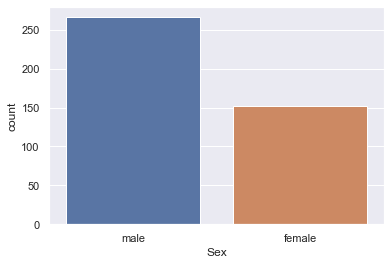

In [43]:
sns.countplot(x='Sex' , data=dfcomp);

### Passenger Survival Class

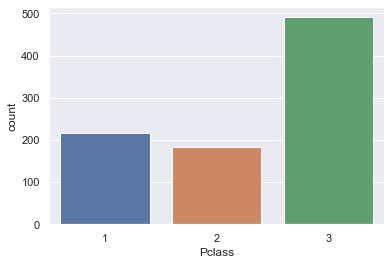

In [44]:
sns.countplot(x='Pclass', data=dftitanic);

**Count plot for 'pclass' using 'dfcomp' data**

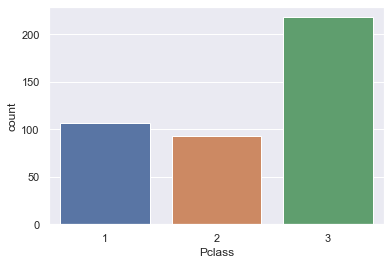

In [45]:
sns.countplot(x = 'Pclass' , data = dfcomp);

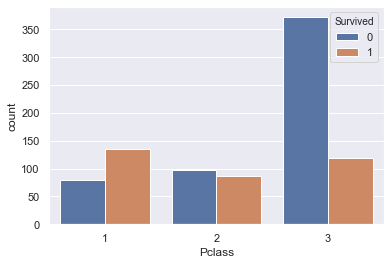

In [46]:
sns.countplot(x='Pclass', hue='Survived', data=dftitanic);

**Passenger Class, Gender & Survival**

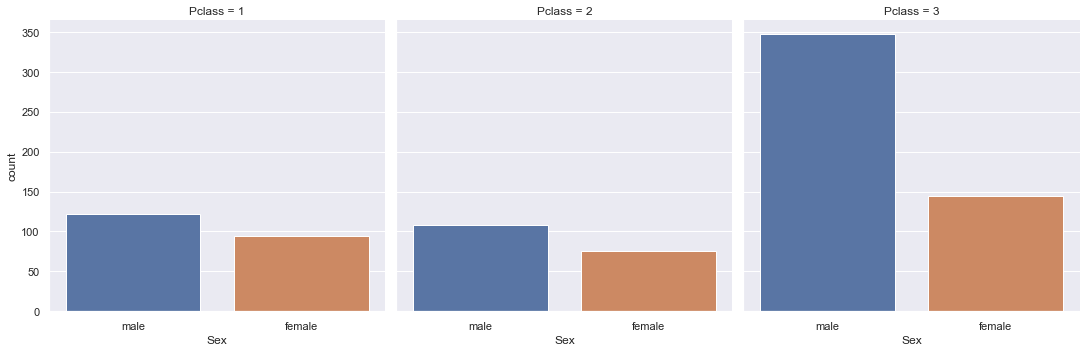

In [47]:
#Use catplot function for subplotting
sns.catplot(x='Sex', col='Pclass', data=dftitanic, kind='count');

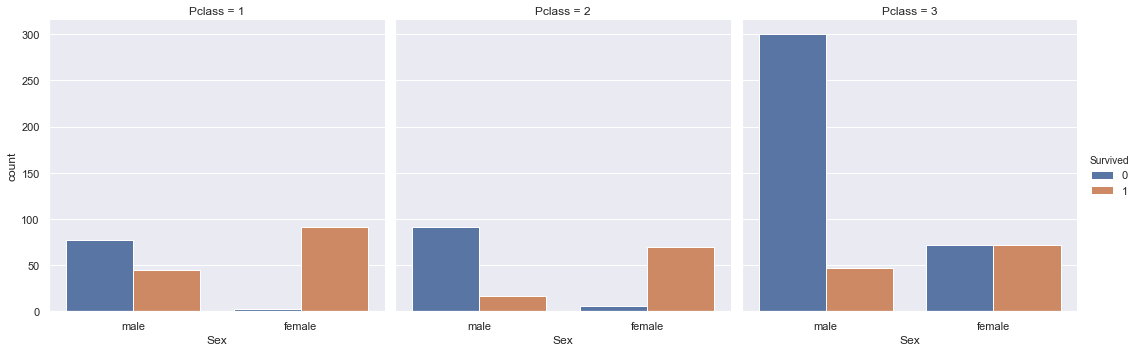

In [49]:
#Adding 'Survived' as hue
sns.catplot(x='Sex', col='Pclass', hue='Survived', data=dftitanic, kind='count');

**Creating subplots using 'dfcomp' for 'gender', 'pclass' and their count**

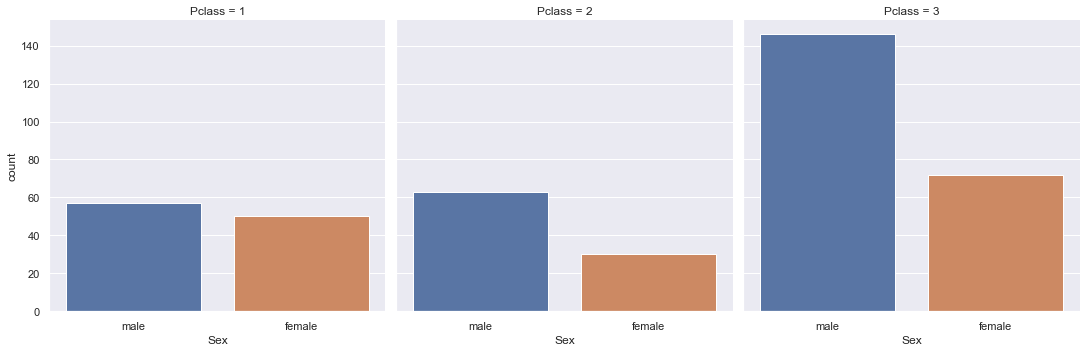

In [50]:
sns.catplot(x='Sex' , col='Pclass', data = dfcomp , kind = 'count');

### Now let's check what is in the names?

In [51]:
dftitanic['Name'].head(10)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

**Extracting & Analyzing Titles**

This is called **feature engineering** where you derive additional columns as per your domain knowledge like creating 'Title' in the following example.

In [52]:
import re

In [53]:
a='Braund, Mr.Owen Harris'

In [54]:
re.search(' ([A-Z][a-z]+)\.', a).group(1)

'Mr'

In [55]:
dftitanic['Title'] = dftitanic['Name'].apply(lambda x: re.search(' ([A-Z][a-z]+)\.', x).group(1))
dftitanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [56]:
dftitanic['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Col           2
Mlle          2
Don           1
Sir           1
Jonkheer      1
Countess      1
Mme           1
Lady          1
Ms            1
Capt          1
Name: Title, dtype: int64

**Finding Titles for dfcomp as well**

In [57]:
dfcomp['Title'] = dfcomp['Name'].apply(lambda x: re.search(' ([A-Z][a-z]+)\.', x).group(1))
dfcomp.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs


**Check the count of unique titles in dfcomp data**

In [59]:
dfcomp['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Dr          1
Dona        1
Ms          1
Name: Title, dtype: int64

The term *Mademoiselle* is a French familiar title, abbreviated **Mlle**, traditionally given to an unmarried woman. The equivalent in English is "Miss". However, the courtesy title "Madame" is accorded women where their marital status is unknown.

In [60]:
dftitanic['Title'] = dftitanic['Title'].replace('Mlle', 'Miss')

In France, one traditionally calls a young, unmarried woman Mademoiselle – Mlle for short – and an older, married woman _Madame_, whose abbreviation is **Mme**.

In [61]:
dftitanic['Title'] = dftitanic['Title'].replace('Mme', 'Mrs')

In [62]:
dftitanic.loc[(~dftitanic['Title'].isin(['Mr', 'Mrs', 'Miss', 'Master'])), 'Title'] = 'Rare Title'

In [63]:
dftitanic['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Rare Title'], dtype=object)

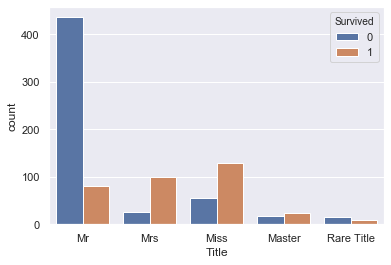

In [64]:
sns.countplot(data=dftitanic,x='Title', hue='Survived');

**And now we shall assign the remaining titles as 'Rare Title' in dfcomp data**

In [65]:
dfcomp['Title'] = dfcomp['Title'].replace('Ms', 'Miss')

In [66]:
dfcomp.loc[(~dfcomp['Title'].isin(['Mr', 'Mrs', 'Miss', 'Master'])), 'Title'] = 'Rare Title'

In [67]:
dfcomp['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Rare Title'], dtype=object)

In [68]:
dfcomp['Title'].value_counts()

Mr            240
Miss           79
Mrs            72
Master         21
Rare Title      6
Name: Title, dtype: int64

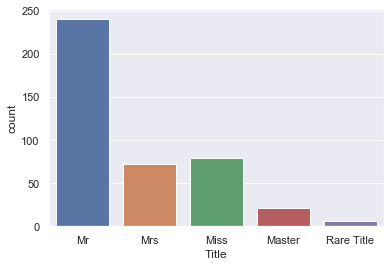

In [69]:
sns.countplot(x='Title' , data=dfcomp);

### Analyzing Travelling Alone vs. Travelling in groups

**Family Size**

In [97]:
#The formula accounts for any Siblings and Parents/children and the person themselves as well
dftitanic['Fsize'] = dftitanic['SibSp'] + dftitanic['Parch']+1

**Display the countplot on column 'Fsize' to check how many people survived and died**

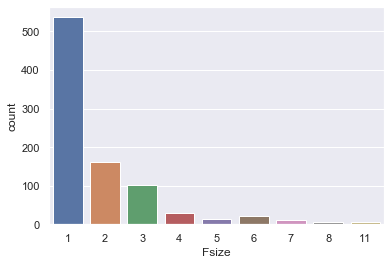

In [98]:
sns.countplot(x='Fsize' , data = dftitanic);

In [99]:
dftitanic.groupby('Fsize')['Survived'].value_counts(normalize=True).reset_index(name='perc')

,Fsize,Survived,perc
0,1,0,0.696462
1,1,1,0.303538
2,2,1,0.552795
3,2,0,0.447205
4,3,1,0.578431
5,3,0,0.421569
6,4,1,0.724138
7,4,0,0.275862
8,5,0,0.800000
9,5,1,0.200000


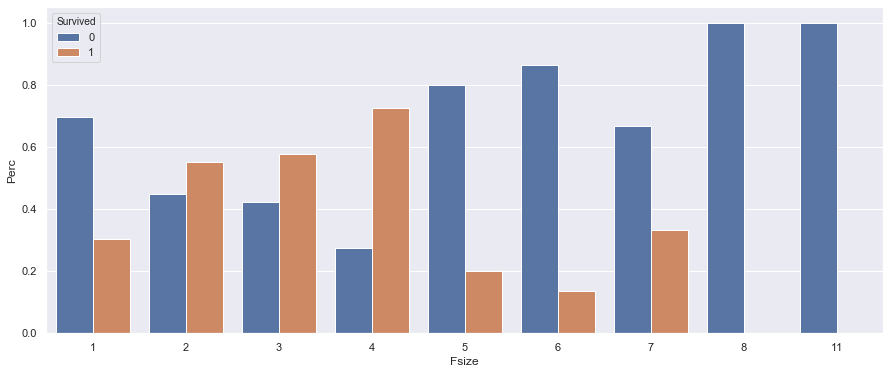

In [100]:
temp = dftitanic.groupby('Fsize')['Survived'].value_counts(normalize=True).reset_index(name='Perc')

plt.figure(figsize=(15,6));
sns.barplot(data=temp,x='Fsize', y='Perc', hue='Survived', dodge=True);

**Now to check how many people booked their tickets together?**

_Apart from families, there could be groups of friends travelling together._

In [101]:
dftitanic['Ticket'].value_counts().head()

CA. 2343    7
1601        7
347082      7
CA 2144     6
3101295     6
Name: Ticket, dtype: int64

In [102]:
#reset_index() is a method to reset index of a Data Frame. reset_index() method sets a list of integer ranging from 0 to length of data as index.
dftitanic['Ticket'].value_counts().reset_index().head()

,index,Ticket
0,CA. 2343,7
1,1601,7
2,347082,7
3,CA 2144,6
4,3101295,6


In [103]:
temp = dftitanic['Ticket'].value_counts().reset_index(name='Tsize')

In [104]:
temp

,index,Tsize
0,CA. 2343,7
1,1601,7
2,347082,7
3,CA 2144,6
4,3101295,6
...,...,...
676,349243,1
677,C.A. 34260,1
678,348124,1
679,CA. 2314,1


In [105]:
dftitanic = dftitanic.merge(temp, left_on='Ticket', right_on='index',how='inner').drop('index', axis=1)
dftitanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Fsize,Tsize_x,Tsize_y,Tsize_x,Tsize_y,Tsize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,2,1,1,1,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,1,1,1,1,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1,1,1,1,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2,2,2,2,2,2
4,138,0,1,"Futrelle, Mr. Jacques Heath",male,37.0,1,0,113803,53.1000,C123,S,Mr,2,2,2,2,2,2


In [106]:
dftitanic[dftitanic['Tsize']>dftitanic['Fsize']]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Fsize,Tsize_x,Tsize_y,Tsize_x,Tsize_y,Tsize
38,21,0,2,"Fynney, Mr. Joseph J",male,35.0,0,0,239865,26.0000,NaN,S,Mr,1,2,2,2,2,2
39,792,0,2,"Gaskell, Mr. Alfred",male,16.0,0,0,239865,26.0000,NaN,S,Mr,1,2,2,2,2,2
56,196,1,1,"Lurette, Miss. Elise",female,58.0,0,0,PC 17569,146.5208,B80,C,Miss,1,2,2,2,2,2
90,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C,Mrs,2,3,3,3,3,3
91,646,1,1,"Harper, Mr. Henry Sleeper",male,48.0,1,0,PC 17572,76.7292,D33,C,Mr,2,3,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
753,780,1,1,"Robert, Mrs. Edward Scott (Elisabeth Walton Mc...",female,43.0,0,1,24160,211.3375,B3,S,Mrs,2,3,3,3,3,3
771,715,0,2,"Greenberg, Mr. Samuel",male,52.0,0,0,250647,13.0000,NaN,S,Mr,1,2,2,2,2,2
772,801,0,2,"Ponesell, Mr. Martin",male,34.0,0,0,250647,13.0000,NaN,S,Mr,1,2,2,2,2,2
813,773,0,2,"Mack, Mrs. (Mary)",female,57.0,0,0,S.O./P.P. 3,10.5000,E77,S,Mrs,1,2,2,2,2,2


**Check the countplot of column 'Tsize' to check how many people survived or died**

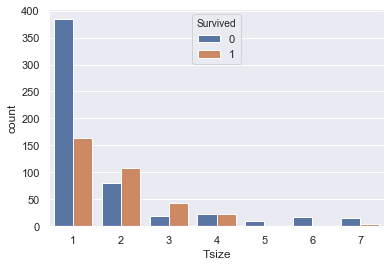

In [107]:
sns.countplot(x='Tsize', hue = 'Survived', data = dftitanic);

In [108]:
temp = dftitanic.groupby('Tsize')['Survived'].value_counts(normalize=True).reset_index(name='Perc')

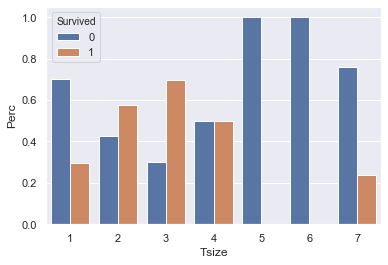

In [109]:
sns.barplot(x='Tsize', y='Perc', hue='Survived', data=temp, dodge=True);

**Consolidating family & friends**

In [110]:
dftitanic['Group'] = dftitanic[['Tsize', 'Fsize']].max(axis=1)

In [111]:
dftitanic.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Fsize,Tsize_x,Tsize_y,Tsize_x,Tsize_y,Tsize,Group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,2,1,1,1,1,1,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,1,1,1,1,1,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1,1,1,1,1,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2,2,2,2,2,2,2
4,138,0,1,"Futrelle, Mr. Jacques Heath",male,37.0,1,0,113803,53.1000,C123,S,Mr,2,2,2,2,2,2,2
5,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,1,1,1,1,1,1,1
6,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Mr,1,1,1,1,1,1,1
7,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Mr,1,1,1,1,1,1,1
8,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Master,5,4,4,4,4,4,5
9,25,0,3,"Palsson, Miss. Torborg Danira",female,8.0,3,1,349909,21.0750,NaN,S,Miss,5,4,4,4,4,4,5


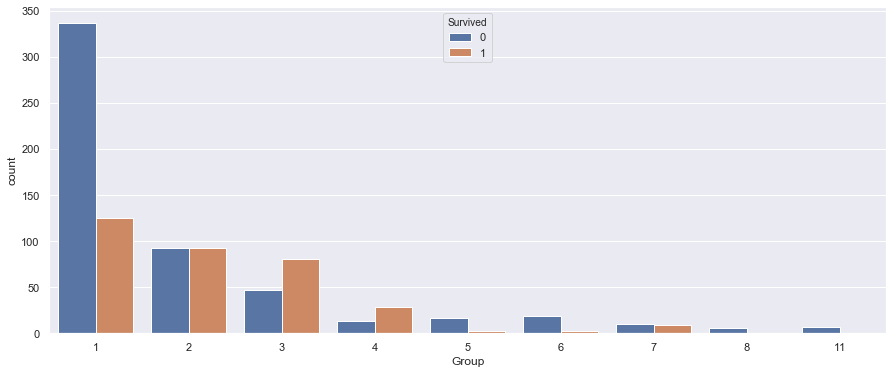

In [112]:
plt.figure(figsize=(15,6));
sns.countplot(x='Group', hue='Survived', data=dftitanic);

In [113]:
dftitanic['GrpSize'] = ''

dftitanic.loc[dftitanic['Group']==1, 'GrpSize'] = 'solo'
dftitanic.loc[dftitanic['Group']==2, 'GrpSize'] =  'couple'
dftitanic.loc[(dftitanic['Group']<=4) & (dftitanic['Group']>=3), 'GrpSize'] =  'group'
dftitanic.loc[dftitanic['Group']>4, 'GrpSize'] = 'large group'
dftitanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,Title,Fsize,Tsize_x,Tsize_y,Tsize_x,Tsize_y,Tsize,Group,GrpSize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,Mr,2,1,1,1,1,1,2,couple
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,Mrs,2,1,1,1,1,1,2,couple
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,Miss,1,1,1,1,1,1,1,solo
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,S,Mrs,2,2,2,2,2,2,2,couple
4,138,0,1,"Futrelle, Mr. Jacques Heath",male,37.0,1,0,113803,53.1000,...,S,Mr,2,2,2,2,2,2,2,couple


In [114]:
dftitanic.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,Title,Fsize,Tsize_x,Tsize_y,Tsize_x,Tsize_y,Tsize,Group,GrpSize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,Mr,2,1,1,1,1,1,2,couple
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,Mrs,2,1,1,1,1,1,2,couple
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,Miss,1,1,1,1,1,1,1,solo
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,S,Mrs,2,2,2,2,2,2,2,couple
4,138,0,1,"Futrelle, Mr. Jacques Heath",male,37.0,1,0,113803,53.1000,...,S,Mr,2,2,2,2,2,2,2,couple
5,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,S,Mr,1,1,1,1,1,1,1,solo
6,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,...,Q,Mr,1,1,1,1,1,1,1,solo
7,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,...,S,Mr,1,1,1,1,1,1,1,solo
8,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,...,S,Master,5,4,4,4,4,4,5,large group
9,25,0,3,"Palsson, Miss. Torborg Danira",female,8.0,3,1,349909,21.0750,...,S,Miss,5,4,4,4,4,4,5,large group


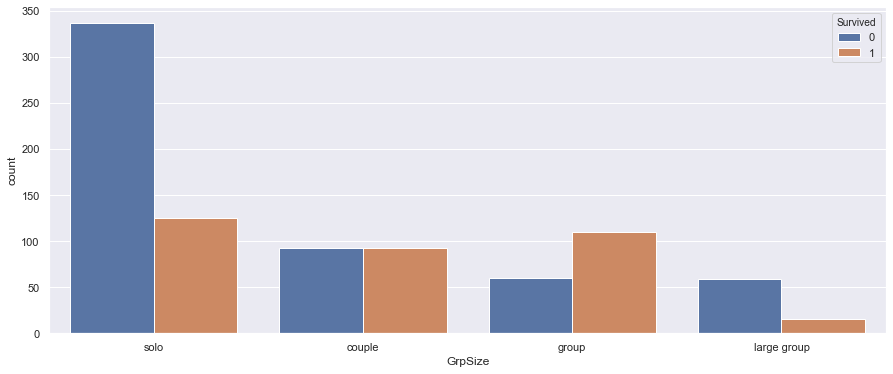

In [115]:
plt.figure(figsize=(15,6));
sns.countplot(x='GrpSize', order=['solo', 'couple', 'group', 'large group'], hue='Survived', data=dftitanic);

**Applying same transformations on *'dfcomp'***

- FSize
- Tsize
- Group Column

In [116]:
#Fsize
dfcomp['Fsize'] = dfcomp['SibSp'] + dfcomp['Parch']+1

#Ticket Size
temp = dfcomp['Ticket'].value_counts().reset_index(name='Tsize')
dfcomp = dfcomp.merge(temp, left_on='Ticket', right_on='index',how='inner').drop('index', axis=1)

# Grouping
dfcomp['Group'] =dfcomp[['Fsize', 'Tsize']].max(axis=1)

In [117]:
dfcomp.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Fsize,Tsize,Group
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr,1,1,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs,2,1,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr,1,1,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr,1,1,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs,3,1,3


In [118]:
dfcomp['GrpSize'] = ''

dfcomp.loc[dfcomp['Group']==1, 'GrpSize'] = 'solo'
dfcomp.loc[dfcomp['Group']==2, 'GrpSize'] =  'couple'
dfcomp.loc[(dfcomp['Group']<=4) & (dftitanic['Group']>=3), 'GrpSize'] =  'group'
dfcomp.loc[dfcomp['Group']>4, 'GrpSize'] = 'large group'
dfcomp.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Fsize,Tsize,Group,GrpSize
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr,1,1,1,solo
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs,2,1,2,couple
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr,1,1,1,solo
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr,1,1,1,solo
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs,3,1,3,


In [119]:
#Applying the same categories for groups on 'dfcomp'
dfcomp['GrpSize'] = ''
dfcomp.loc[dfcomp['Group']==1, 'GrpSize'] =  'solo'
dfcomp.loc[dfcomp['Group']==2, 'GrpSize'] =  'couple'
dfcomp.loc[(dfcomp['Group']<=4) & (dfcomp['Group']>=3), 'GrpSize'] =  'group'
dfcomp.loc[dfcomp['Group']>4, 'GrpSize'] =  'large group'
dfcomp.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Fsize,Tsize,Group,GrpSize
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr,1,1,1,solo
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs,2,1,2,couple
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr,1,1,1,solo
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr,1,1,1,solo
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs,3,1,3,group


### Effect of Fare

**Check the null values of fare**

In [120]:
dftitanic['Fare'].isnull().sum()

0

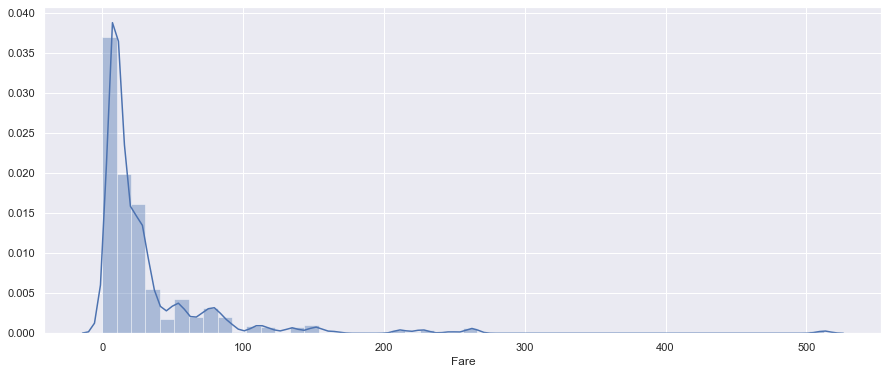

In [121]:
plt.subplots(figsize=(15,6))
sns.distplot(dftitanic['Fare']);

In [122]:
dftitanic[dftitanic['Fare'] < 0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,Title,Fsize,Tsize_x,Tsize_y,Tsize_x,Tsize_y,Tsize,Group,GrpSize


In [123]:
dftitanic[dftitanic['Fare'] == 0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,Title,Fsize,Tsize_x,Tsize_y,Tsize_x,Tsize_y,Tsize,Group,GrpSize
266,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,...,S,Mr,1,4,4,4,4,4,4,group
267,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,...,S,Mr,1,4,4,4,4,4,4,group
268,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,...,S,Mr,1,4,4,4,4,4,4,group
269,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,...,S,Mr,1,4,4,4,4,4,4,group
366,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,...,S,Mr,1,1,1,1,1,1,1,solo
386,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,...,S,Mr,1,3,3,3,3,3,3,group
387,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,...,S,Mr,1,3,3,3,3,3,3,group
388,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,...,S,Mr,1,3,3,3,3,3,3,group
592,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,...,S,Mr,1,1,1,1,1,1,1,solo
715,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,...,S,Mr,1,1,1,1,1,1,1,solo


In [124]:
dftitanic.loc[(dftitanic['Fare'] == 0) & (dftitanic['Pclass'] == 1), 'Fare'] = dftitanic[dftitanic['Pclass'] == 1]['Fare'].median()
dftitanic.loc[(dftitanic['Fare'] == 0) & (dftitanic['Pclass'] == 2), 'Fare'] = dftitanic[dftitanic['Pclass'] == 2]['Fare'].median()
dftitanic.loc[(dftitanic['Fare'] == 0) & (dftitanic['Pclass'] == 3), 'Fare'] = dftitanic[dftitanic['Pclass'] == 3]['Fare'].median()

In [125]:
dftitanic[dftitanic['Fare']==0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,Title,Fsize,Tsize_x,Tsize_y,Tsize_x,Tsize_y,Tsize,Group,GrpSize


In [126]:
#Assigning categories to fare
dftitanic['FareCat'] = ''
dftitanic.loc[dftitanic['Fare']<=10, 'FareCat'] = '0-10'
dftitanic.loc[(dftitanic['Fare']>10) & (dftitanic['Fare']<=25), 'FareCat'] = '10-25'
dftitanic.loc[(dftitanic['Fare']>25) & (dftitanic['Fare']<=40), 'FareCat'] = '25-40'
dftitanic.loc[(dftitanic['Fare']>40) & (dftitanic['Fare']<=70), 'FareCat'] = '40-70'
dftitanic.loc[(dftitanic['Fare']>70) & (dftitanic['Fare']<=100), 'FareCat'] = '70-100'
dftitanic.loc[dftitanic['Fare']>100, 'FareCat'] = '100+'
dftitanic[['Fare', 'FareCat']].head()

,Fare,FareCat
0,7.2500,0-10
1,71.2833,70-100
2,7.9250,0-10
3,53.1000,40-70
4,53.1000,40-70


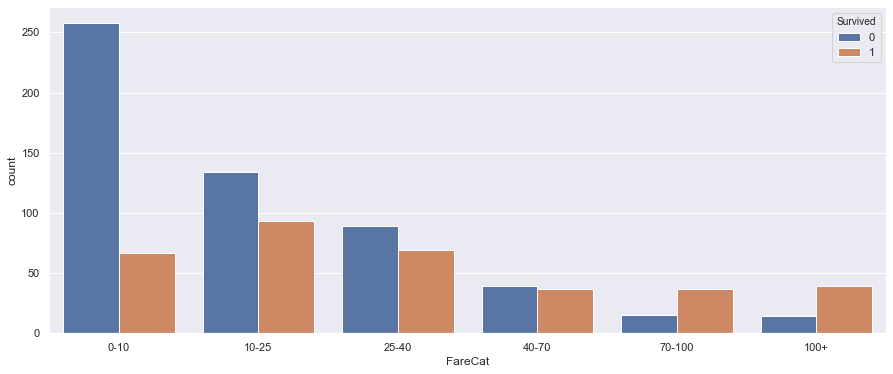

In [127]:
plt.subplots(figsize=(15,6))
sns.countplot(x='FareCat', order=['0-10', '10-25', '25-40', '40-70', '70-100', '100+'], hue='Survived', data=dftitanic);

**Applying same changes on *'dfcomp'***

In [128]:
#Check if fare is 0 in any case or not
dfcomp[dfcomp['Fare'] == 0]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Fsize,Tsize,Group,GrpSize
294,1158,1,"Chisholm, Mr. Roderick Robert Crispin",male,NaN,0,0,112051,0.0,NaN,S,Mr,1,1,1,solo
383,1264,1,"Ismay, Mr. Joseph Bruce",male,49.0,0,0,112058,0.0,B52 B54 B56,S,Mr,1,1,1,solo


In [129]:
#Replace it with median if it is zero in any case
dfcomp.loc[(dfcomp['Fare'] == 0) & (dfcomp['Pclass'] == 1), 'Fare'] = dfcomp[dfcomp['Pclass'] == 1]['Fare'].median()
dfcomp.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Fsize,Tsize,Group,GrpSize
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr,1,1,1,solo
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs,2,1,2,couple
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr,1,1,1,solo
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr,1,1,1,solo
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs,3,1,3,group


**Categorizing fare as follows:**

- If Fare is <=10, then category= '0-10' 
- If Fare is >10 and Fare is <=25, then category= '10-25'
- If Fare is >25 and Fare is <=40, then category= '25-40'
- If Fare is >40 and Fare is <=70, then category= '40-70'
- If Fare is >70 and Fare is <=100, then category= '70-100'
- If Fare is >100, then category= '100+'

In [130]:
#Assigning Categories to fare for 'dfcomp' data
dfcomp['FareCat'] = ''
dfcomp.loc[dfcomp['Fare']<=10, 'FareCat'] = '0-10'
dfcomp.loc[(dfcomp['Fare']>10) & (dfcomp['Fare']<=25), 'FareCat'] = '10-25'
dfcomp.loc[(dfcomp['Fare']>25) & (dfcomp['Fare']<=40), 'FareCat'] = '25-40'
dfcomp.loc[(dfcomp['Fare']>40) & (dfcomp['Fare']<=70), 'FareCat'] = '40-70'
dfcomp.loc[(dfcomp['Fare']>70) & (dfcomp['Fare']<=100), 'FareCat'] = '70-100'
dfcomp.loc[dfcomp['Fare']>100, 'FareCat'] = '100+'

dfcomp[['Fare', 'FareCat']].head()

,Fare,FareCat
0,7.8292,0-10
1,7.0000,0-10
2,9.6875,0-10
3,8.6625,0-10
4,12.2875,10-25


In [131]:
dfcomp[['Fare', 'FareCat']].head(20)

,Fare,FareCat
0,7.8292,0-10
1,7.0000,0-10
2,9.6875,0-10
3,8.6625,0-10
4,12.2875,10-25
5,9.2250,0-10
6,7.6292,0-10
7,29.0000,25-40
8,7.2292,0-10
9,24.1500,10-25


### Now let's check the effect of 'Embarked' variable

_C = Cherbourg(France), Q = Queenstown(Ireland), S = Southampton(England)_

**Making a countplot for embarkments**   

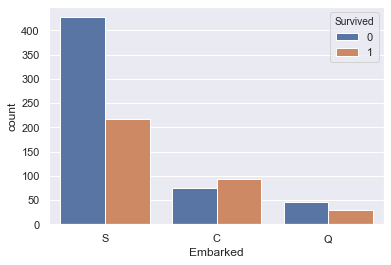

In [132]:
sns.countplot(x = 'Embarked' , data = dftitanic , hue = 'Survived');

***Engineered Features***

In [133]:
dftitanic.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Title,Fsize,Tsize_x,Tsize_y,Tsize_x,Tsize_y,Tsize,Group,GrpSize,FareCat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,Mr,2,1,1,1,1,1,2,couple,0-10
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,Mrs,2,1,1,1,1,1,2,couple,70-100


In [134]:
dfcomp.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Fsize,Tsize,Group,GrpSize,FareCat
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr,1,1,1,solo,0-10
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs,2,1,2,couple,0-10


## Missing Values

### *Age*

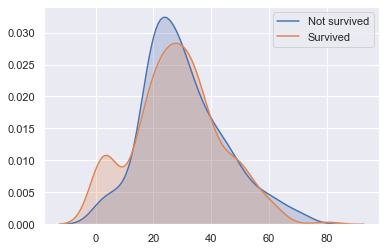

In [135]:
#Checking distribution of 'survived' and 'not survived'
sns.kdeplot(dftitanic[dftitanic['Survived'] == 0]['Age'].dropna(), shade=True,label="Not survived");
sns.kdeplot(dftitanic[dftitanic['Survived'] == 1]['Age'].dropna(), shade=True,label="Survived");

In [136]:
temp = dftitanic[dftitanic['Age'].isnull() == False]
temp

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Title,Fsize,Tsize_x,Tsize_y,Tsize_x,Tsize_y,Tsize,Group,GrpSize,FareCat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,Mr,2,1,1,1,1,1,2,couple,0-10
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,Mrs,2,1,1,1,1,1,2,couple,70-100
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,Miss,1,1,1,1,1,1,1,solo,0-10
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,Mrs,2,2,2,2,2,2,2,couple,40-70
4,138,0,1,"Futrelle, Mr. Jacques Heath",male,37.0,1,0,113803,53.1000,...,Mr,2,2,2,2,2,2,2,couple,40-70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,...,Mr,1,1,1,1,1,1,1,solo,0-10
887,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,...,Rare Title,1,1,1,1,1,1,1,solo,10-25
888,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,...,Miss,1,1,1,1,1,1,1,solo,25-40
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,...,Mr,1,1,1,1,1,1,1,solo,25-40


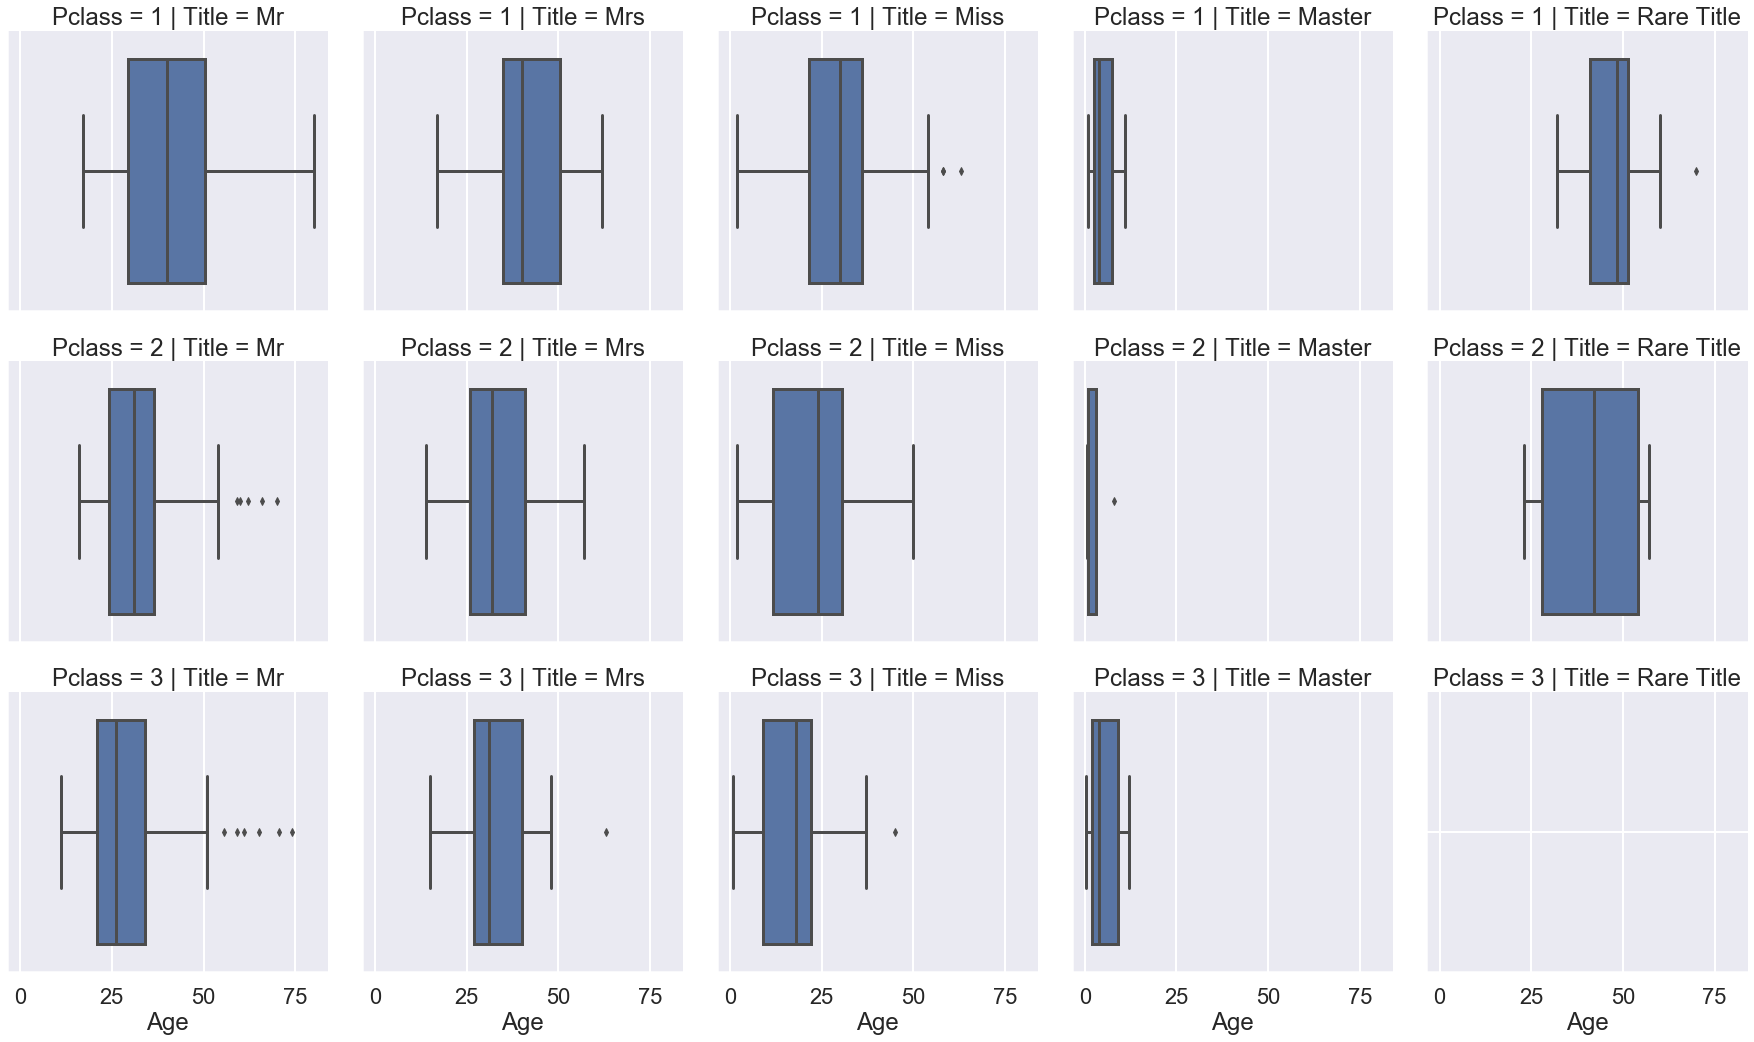

In [137]:
sns.set_context('poster')
sns.catplot(kind='box', x='Age', col='Title', row='Pclass', data=temp);

In [138]:
dftitanic['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Rare Title'], dtype=object)

In [139]:
dftitanic['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [140]:
dftitanic.loc[(dftitanic['Title'] == 'Mr') & (dftitanic['Pclass'] == 3), 'Age'].median()

26.0

In [141]:
for t in dftitanic['Title'].unique():
    for p in dftitanic['Pclass'].unique():
        dftitanic.loc[(dftitanic['Title'] == t) & (dftitanic['Pclass'] == p) & (dftitanic['Age'].isnull()), 'Age'] = dftitanic.loc[(dftitanic['Title'] == t) & (dftitanic['Pclass'] == p), 'Age'].median()

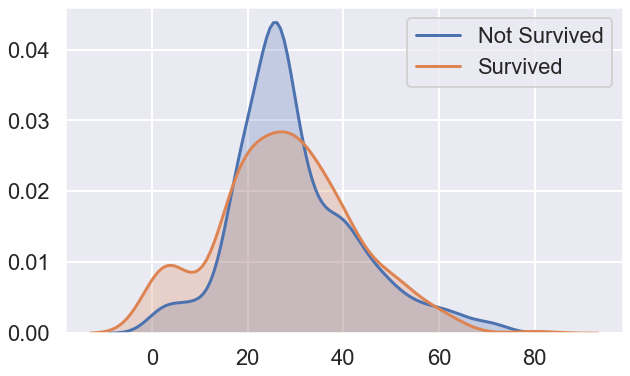

In [142]:
plt.subplots(figsize=(10,6))
sns.kdeplot(dftitanic[dftitanic['Survived'] == 0]['Age'], shade=True,label='Not Survived');
sns.kdeplot(dftitanic[dftitanic['Survived'] == 1]['Age'], shade=True,label='Survived');

In [145]:
#Check if there is any null value in the column 'Age'
dftitanic['Age'].isnull().sum()

0

**Creating Age categories**

In [146]:
dftitanic['AgeCat']=''
dftitanic.loc[ dftitanic['Age'] <= 16, 'AgeCat'] = '0-16'
dftitanic.loc[(dftitanic['Age'] > 16) & (dftitanic['Age'] <= 32), 'AgeCat'] = '16-32'
dftitanic.loc[(dftitanic['Age'] > 32) & (dftitanic['Age'] <= 48), 'AgeCat'] = '32-48'
dftitanic.loc[(dftitanic['Age'] > 48) & (dftitanic['Age'] <= 64), 'AgeCat'] = '48-64'
dftitanic.loc[ dftitanic['Age'] > 64, 'AgeCat']= '64+'

In [147]:
dftitanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Fsize,Tsize_x,Tsize_y,Tsize_x,Tsize_y,Tsize,Group,GrpSize,FareCat,AgeCat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,2,1,1,1,1,1,2,couple,0-10,16-32
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,2,1,1,1,1,1,2,couple,70-100,32-48
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,1,1,1,1,1,1,1,solo,0-10,16-32
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,2,2,2,2,2,2,2,couple,40-70,32-48
4,138,0,1,"Futrelle, Mr. Jacques Heath",male,37.0,1,0,113803,53.1000,...,2,2,2,2,2,2,2,couple,40-70,32-48
5,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,1,1,1,1,1,1,1,solo,0-10,32-48
6,6,0,3,"Moran, Mr. James",male,26.0,0,0,330877,8.4583,...,1,1,1,1,1,1,1,solo,0-10,16-32
7,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,...,1,1,1,1,1,1,1,solo,40-70,48-64
8,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,...,5,4,4,4,4,4,5,large group,10-25,0-16
9,25,0,3,"Palsson, Miss. Torborg Danira",female,8.0,3,1,349909,21.0750,...,5,4,4,4,4,4,5,large group,10-25,0-16


**Now we shall replace missing Age & Fair values in *'dfcomp'* dataset**

In [148]:
#Check if there are any missing values for age and fare in dfcomp
dfcomp.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Title            0
Fsize            0
Tsize            0
Group            0
GrpSize          0
FareCat          0
dtype: int64

In [149]:
temp2 = dfcomp[dfcomp['Age'].isnull() == False]
temp2

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Fsize,Tsize,Group,GrpSize,FareCat
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr,1,1,1,solo,0-10
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs,2,1,2,couple,0-10
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr,1,1,1,solo,0-10
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr,1,1,1,solo,0-10
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs,3,1,3,group,10-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,1298,2,"Ware, Mr. William Jeffery",male,23.0,1,0,28666,10.5000,NaN,S,Mr,2,1,2,couple,10-25
411,1303,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,C78,Q,Mrs,2,1,2,couple,70-100
412,1304,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,NaN,S,Miss,1,1,1,solo,0-10
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Rare Title,1,1,1,solo,100+


In [150]:
#Filling in the values with median
for t in dfcomp['Title'].unique():
    for p in dfcomp['Pclass'].unique():
        dfcomp.loc[(dfcomp['Title'] == t) & (dfcomp['Pclass'] == p) & (dfcomp['Age'].isnull()), 'Age'] = dfcomp.loc[(dfcomp['Title'] == t) & (dfcomp['Pclass'] == p), 'Age'].median()

In [151]:
#Checking the null values in 'Age' column again
dfcomp['Age'].isnull().sum()

0

In [152]:
#Checking the pclass and title for which the null value exists
dfcomp.loc[(dfcomp['Age'].isnull()),'Pclass':'Title'] 

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title


In [153]:
#Filling in the missing value with the median of the specific pclass
dfcomp.loc[(dfcomp['Age'].isnull()) & (dfcomp['Pclass'] == 3) & (dfcomp['Title'] == 'Rare Title'), 'Age'] = dfcomp.loc[(dfcomp['Title'] == 'Rare Title') & (dfcomp['Pclass'] == 3), 'Age'].median()

**Repeating the procedure above for 'Fare'**

In [154]:
#Check if there is any null value 
dfcomp['Fare'].isnull().sum()

1

In [155]:
#Check the pclass and title for which the null value exists
dfcomp.loc[(dfcomp['Fare'].isnull()),'Pclass':'Title'] 

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
172,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,Mr


In [156]:
#Fill in the missing value
dfcomp.loc[(dfcomp['Age'].isnull()) & (dfcomp['Pclass'] == 3) & (dfcomp['Title'] == 'Mr'), 'Age'] = dfcomp.loc[(dfcomp['Title'] == 'Mr') & (dfcomp['Pclass'] == 3), 'Age'].median()

In [157]:
dfcomp[['Fare']].head()

,Fare
0,7.8292
1,7.0000
2,9.6875
3,8.6625
4,12.2875


In [158]:
#Assigning the category to the newly added value
dfcomp.loc[dfcomp['Fare']<=10, 'FareCat'] = '0-10'

**Making Categories for 'Age' as follows:**

- If Age is <=16, then category= '0-16' 
- If Age is >16 and Fare is <=32, then category= '16-32'
- If Age is >32 and Fare is <=48, then category= '32-48'
- If Age is >48 and Fare is <=64, then category= '48-64'
- If Agee is >64, then category= '64+'

In [160]:
dfcomp['AgeCat']=''
dfcomp.loc[ dfcomp['Age'] <= 16, 'AgeCat'] = '0-16'
dfcomp.loc[(dfcomp['Age'] > 16) & (dfcomp['Age'] <= 32), 'AgeCat'] = '16-32'
dfcomp.loc[(dfcomp['Age'] > 32) & (dfcomp['Age'] <= 48), 'AgeCat'] = '32-48'
dfcomp.loc[(dfcomp['Age'] > 48) & (dfcomp['Age'] <= 64), 'AgeCat'] = '48-64'
dfcomp.loc[ dfcomp['Age'] > 64, 'AgeCat']= '64+'

### Embarkment and null values

In [161]:
dftitanic.describe(include='O')

,Name,Sex,Ticket,Cabin,Embarked,Title,GrpSize,FareCat,AgeCat
count,891,891,891,204,889,891,891,891,891
unique,891,2,681,147,3,5,4,6,5
top,"Wheadon, Mr. Edward H",male,CA. 2343,B96 B98,S,Mr,solo,0-10,16-32
freq,1,577,7,4,644,517,462,325,490


In [162]:
dftitanic['Embarked'].isnull().sum()

2

In [163]:
dftitanic.loc[(dftitanic['Embarked'].isnull()),'Embarked']='S'

**Checking the null values in 'Embarked' for *'dfcomp'* and see if any value needs to be replaced**

In [164]:
dfcomp['Embarked'].isnull().sum()

0

### Cabin

Defining the cabin type

In [167]:
dftitanic['CabinType'] = dftitanic['Cabin'].str[0]

In [168]:
dftitanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Tsize_x,Tsize_y,Tsize_x,Tsize_y,Tsize,Group,GrpSize,FareCat,AgeCat,CabinType
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,1,1,1,1,1,2,couple,0-10,16-32,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,1,1,1,1,1,2,couple,70-100,32-48,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,1,1,1,1,1,1,solo,0-10,16-32,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,2,2,2,2,2,2,couple,40-70,32-48,C
4,138,0,1,"Futrelle, Mr. Jacques Heath",male,37.0,1,0,113803,53.1000,...,2,2,2,2,2,2,couple,40-70,32-48,C


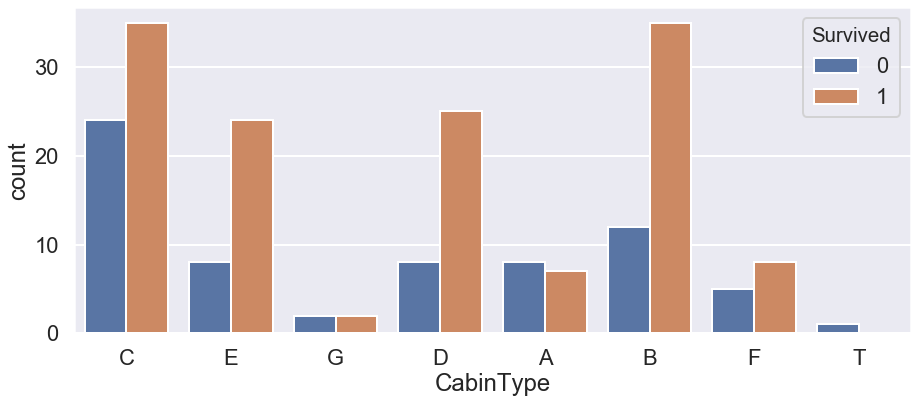

In [169]:
plt.figure(figsize=(15,6))
sns.countplot(x='CabinType', hue='Survived', data=dftitanic);

Dropping Cabin

In [170]:
dftitanic.groupby(['CabinType', 'Pclass'])['Pclass'].count()

CabinType  Pclass
A          1         15
B          1         47
C          1         59
D          1         29
           2          4
E          1         25
           2          4
           3          3
F          2          8
           3          5
G          3          4
T          1          1
Name: Pclass, dtype: int64

In [171]:
dftitanic.drop('Cabin',axis=1,inplace=True)

In [172]:
dftitanic.drop('CabinType',axis=1,inplace=True)

In [173]:
dftitanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Fsize,Tsize_x,Tsize_y,Tsize_x,Tsize_y,Tsize,Group,GrpSize,FareCat,AgeCat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,2,1,1,1,1,1,2,couple,0-10,16-32
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,2,1,1,1,1,1,2,couple,70-100,32-48
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,1,1,1,1,1,1,1,solo,0-10,16-32
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,2,2,2,2,2,2,2,couple,40-70,32-48
4,138,0,1,"Futrelle, Mr. Jacques Heath",male,37.0,1,0,113803,53.1000,...,2,2,2,2,2,2,2,couple,40-70,32-48


**Dropping cabin from 'dfcomp' as well**

In [174]:
dfcomp.drop('Cabin', axis=1, inplace=True)

**Check missing values in 'dftitanic'**

In [175]:
dftitanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Title          0
Fsize          0
Tsize_x        0
Tsize_y        0
Tsize_x        0
Tsize_y        0
Tsize          0
Group          0
GrpSize        0
FareCat        0
AgeCat         0
dtype: int64

**Check missing values in 'dfcomp'**

In [176]:
dfcomp.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
Title          0
Fsize          0
Tsize          0
Group          0
GrpSize        0
FareCat        0
AgeCat         0
dtype: int64

## Feature Selection

In [177]:
sns.set_context('poster')

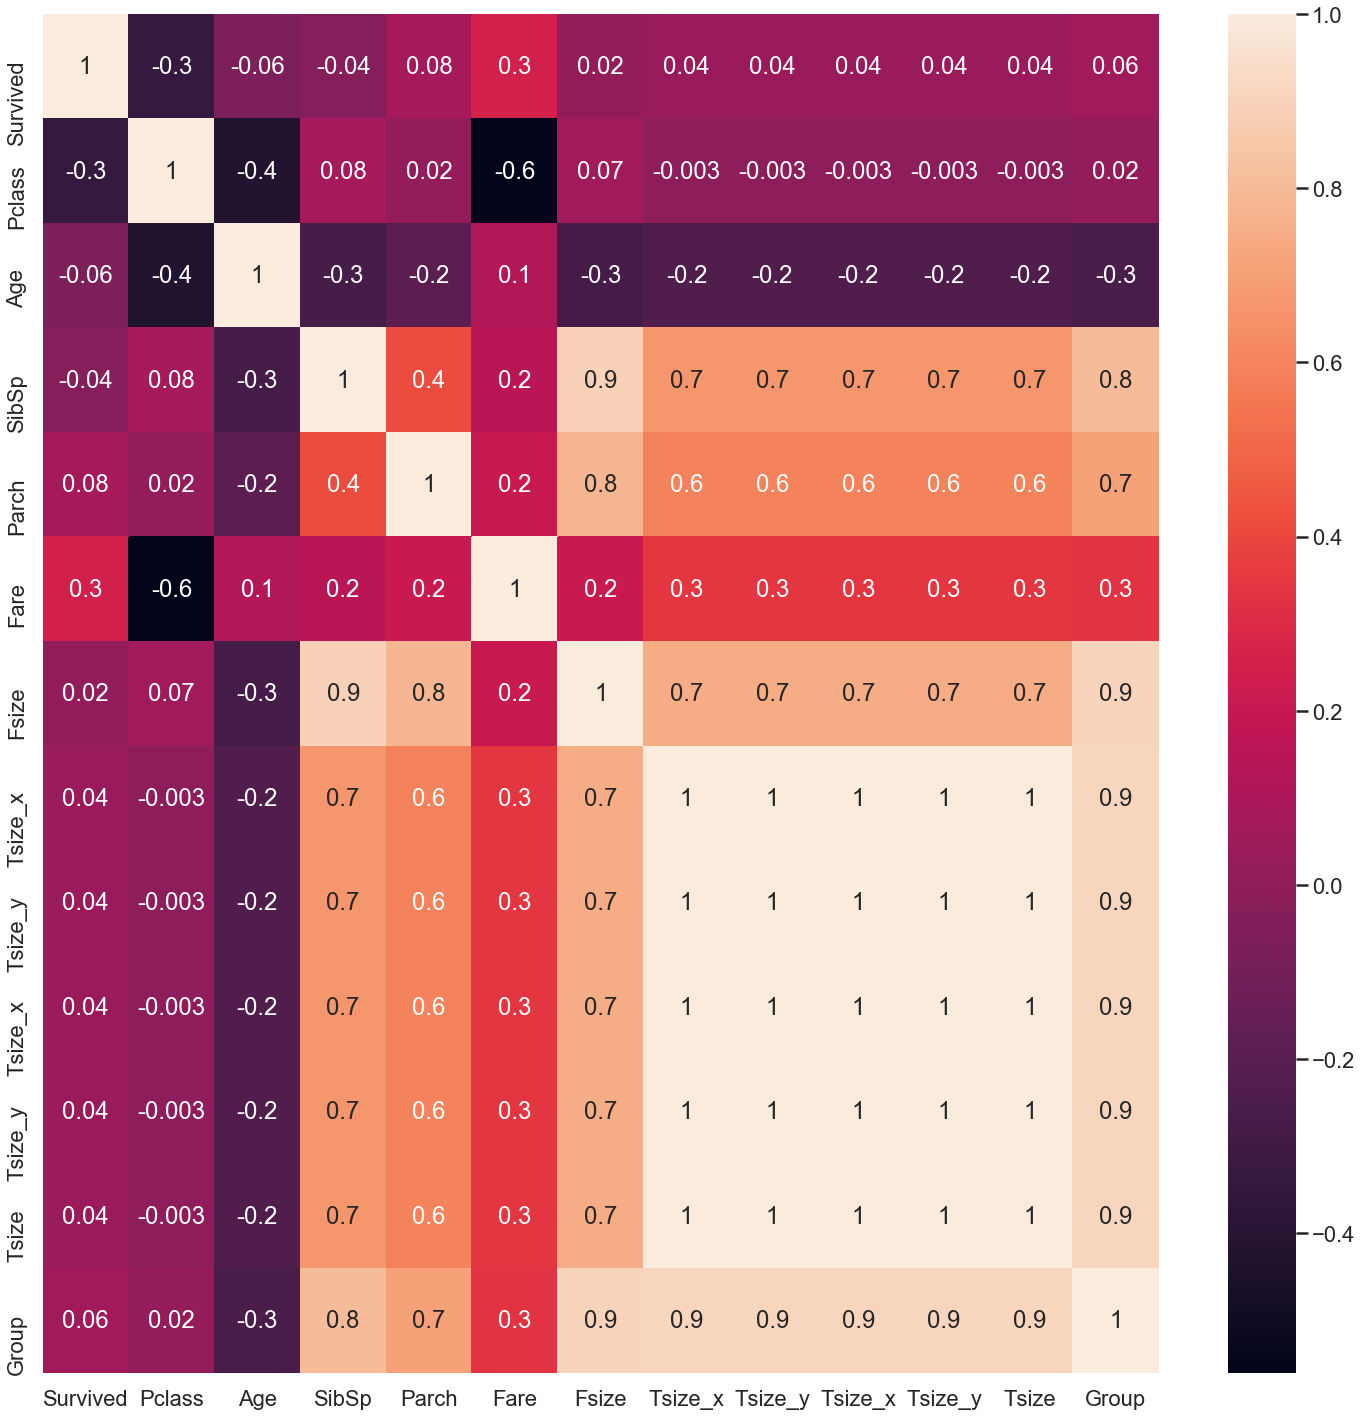

In [180]:
sns.set_context('poster')
plt.figure(figsize=(25,25))
cor = dftitanic.drop('PassengerId',axis=1).corr()
sns.heatmap(cor, annot=True, fmt='.1g');

The above heat map shows the corelation of different columns with eachother. A heatmap often helps to view the corelation as seen above. Looking at the above heatmap we can conclude that which attributes or columns are corelated and and can be removed to get a better shaped dataset.

The following points are to be considered for dropping the columns

- **'Group'** holds a corelation of 0.9 with **'Fsize'** and **'Tsize'**. So we will remove **'Group'** and **'Tsize'** because related data can be found in **'GrpSize'**.
- **'Fsize'** still has a corelation of 0.9  with **'SibSp'** and 0.8 with **'Parch'**.So we will remove 'Fsize' because **'SibSp'** and **'Parch'** are providing the required information.
- The **'Name'** column can also be removed because **'Title'** has been extracted.
- Similarly **'Age'** and **'Fare'** can also be removed because **'AgeCat'** and **'FareCat'** provide the related information.

**So the final columns to be dropped are: 'Name','Age','Fare','Ticket','Fsize','Tsize' and 'Group'**

In [181]:
drop_features = ['Name','Age','Fare','Ticket','Fsize','Tsize','Group']

In [182]:
#Selecting final features
dftitanic.drop(drop_features,axis=1,inplace=True)

**Drawing the heatmap, finding the correlation and check which features are to be removed from 'dfcomp'**

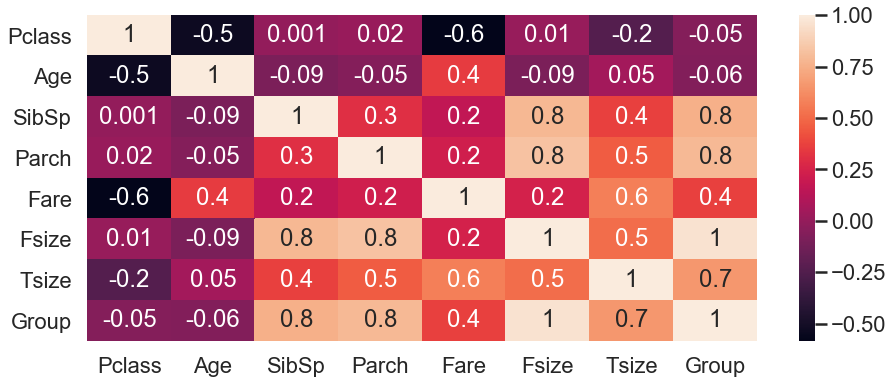

In [183]:
#Heat map
sns.set_context('poster')
plt.figure(figsize=(15,6))
cor2 = dfcomp.drop('PassengerId', axis=1).corr()
sns.heatmap(cor2, annot=True, fmt='.1g');

In [184]:
#Drop the features in dfcomp using drop_features
drop_features2 = ['Name','Age','Fare','Ticket','Fsize','Tsize','Group']
dfcomp.drop(drop_features2, axis=1, inplace=True)

In [185]:
dfcomp.head(3)

,PassengerId,Pclass,Sex,SibSp,Parch,Embarked,Title,GrpSize,FareCat,AgeCat
0,892,3,male,0,0,Q,Mr,solo,0-10,32-48
1,893,3,female,1,0,S,Mrs,couple,0-10,32-48
2,894,2,male,0,0,Q,Mr,solo,0-10,48-64


**Exporting final dataset in csv file**

In [186]:
dftitanic.to_csv('titanic_clean.csv',index=False)

**Exporting final dataset of *'dfcomp'* into csv file**

In [187]:
dfcomp.to_csv('comp_clean.csv', index=False)